

<br>
<font>

<div dir=ltr align=center>

<br>
<font color=900C3F size=10>
Machine Learning In Neuroimaging <br>

<br>
<font color=FF5733 size=6 dir=ltr align=center>
Session 3: Practical: Regression, preprocessing data p1  <br>

<font color=D00000 size=5>

<br>
Winter 2025

<font color=FFC300 size=6>
<br>
Fatemeh Jamshidian
    <!-- <br> -->



In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.preprocessing import PolynomialFeatures



In [141]:
data = pd.read_csv('mine.csv')

In [143]:
data

,Unnamed: 0,FA_Hippocampus,FA_Prefrontal,MD_Hippocampus,MD_Prefrontal,Age,Cognitive_Decline
0,0,0.474836,0.501467,0.640557,0.940839,67,2216.829743
1,1,0.443087,0.513647,0.740062,0.739340,66,889.079088
2,2,0.482384,0.544983,0.800524,0.954353,63,4581.742905
3,3,0.526151,0.543228,0.804698,1.012677,80,3797.139451
4,4,0.438292,0.397340,0.754993,0.899612,73,1105.308270
...,...,...,...,...,...,...,...
195,195,0.469266,0.451849,0.748998,0.976378,83,4991.454566
196,196,0.405807,0.377212,0.773013,0.845253,78,4670.384190
197,197,0.457686,0.561232,0.702124,0.931780,53,3038.353509
198,198,0.452910,0.473128,0.755571,0.853398,66,5197.873133


In [145]:
data.describe()

,Unnamed: 0,FA_Hippocampus,FA_Prefrontal,MD_Hippocampus,MD_Prefrontal,Age,Cognitive_Decline
count,200.000000,185.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,0.446663,0.482081,0.804623,0.851076,68.200000,2765.340688
std,57.879185,0.046992,0.072207,0.215748,0.122349,10.530167,1754.638606
min,0.000000,0.319013,-0.100000,0.552836,0.526374,50.000000,423.793724
25%,49.750000,0.412313,0.442205,0.720612,0.765224,59.750000,1128.462838
50%,99.500000,0.448209,0.484368,0.792240,0.852671,67.000000,2435.237528
75%,149.250000,0.474836,0.521234,0.857209,0.932221,78.000000,4085.540902
max,199.000000,0.586008,0.711164,3.500000,1.165886,84.000000,6364.853979


In [147]:
data.isnull().sum()

Unnamed: 0            0
FA_Hippocampus       15
FA_Prefrontal         0
MD_Hippocampus        0
MD_Prefrontal         0
Age                   0
Cognitive_Decline     0
dtype: int64

In [149]:
data['FA_Hippocampus'] = data['FA_Hippocampus'].fillna(data['FA_Hippocampus'].mean())

In [151]:
data.isnull().sum()

Unnamed: 0           0
FA_Hippocampus       0
FA_Prefrontal        0
MD_Hippocampus       0
MD_Prefrontal        0
Age                  0
Cognitive_Decline    0
dtype: int64

In [153]:
data = data.iloc[: , 1:]

In [155]:
data

,FA_Hippocampus,FA_Prefrontal,MD_Hippocampus,MD_Prefrontal,Age,Cognitive_Decline
0,0.474836,0.501467,0.640557,0.940839,67,2216.829743
1,0.443087,0.513647,0.740062,0.739340,66,889.079088
2,0.482384,0.544983,0.800524,0.954353,63,4581.742905
3,0.526151,0.543228,0.804698,1.012677,80,3797.139451
4,0.438292,0.397340,0.754993,0.899612,73,1105.308270
...,...,...,...,...,...,...
195,0.469266,0.451849,0.748998,0.976378,83,4991.454566
196,0.405807,0.377212,0.773013,0.845253,78,4670.384190
197,0.457686,0.561232,0.702124,0.931780,53,3038.353509
198,0.452910,0.473128,0.755571,0.853398,66,5197.873133


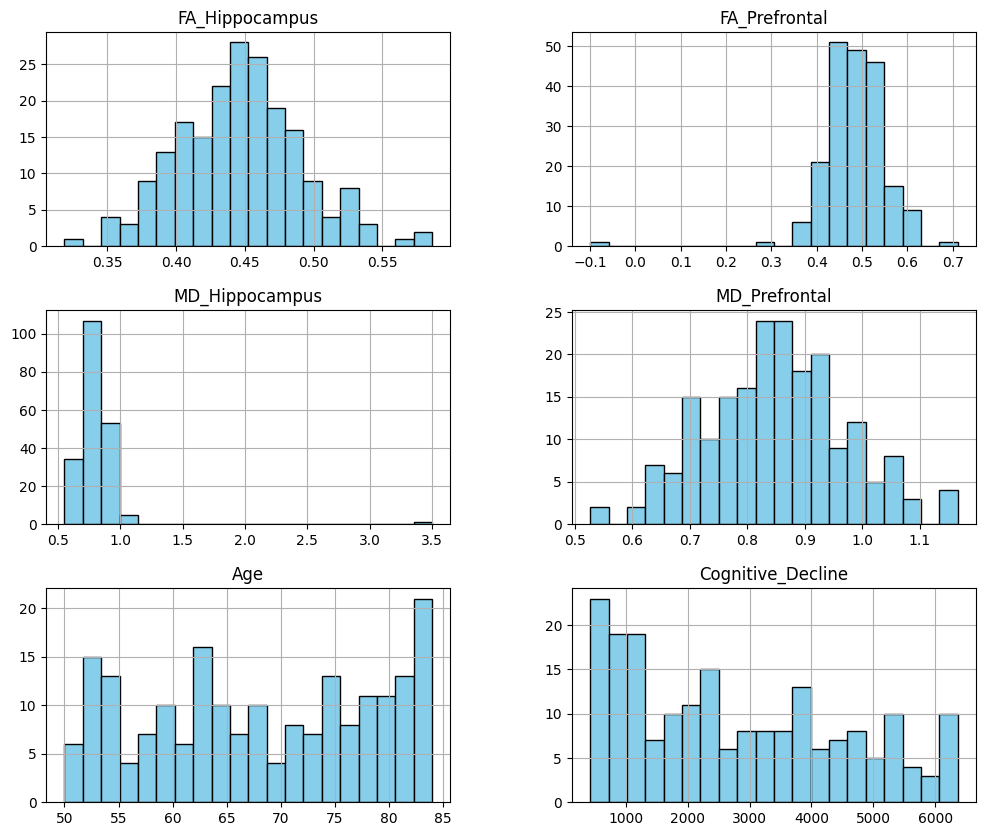

In [157]:
data.hist(bins=20, figsize=(12,10), color = 'skyblue', edgecolor = 'black')
plt.show()

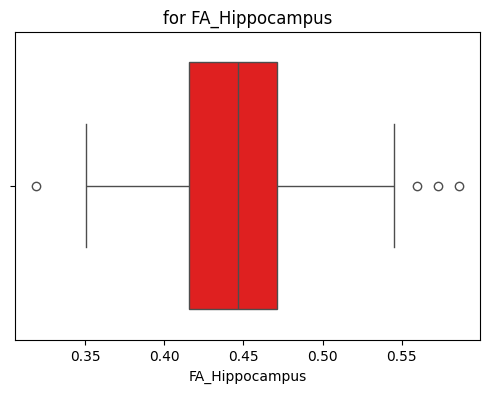

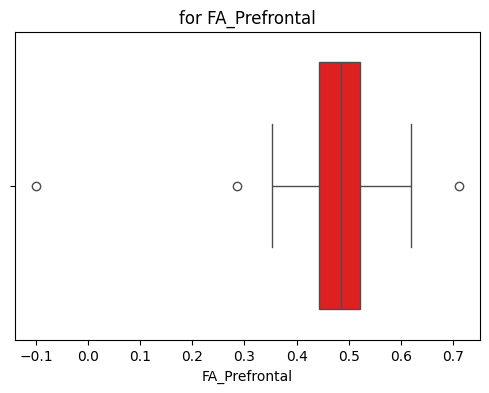

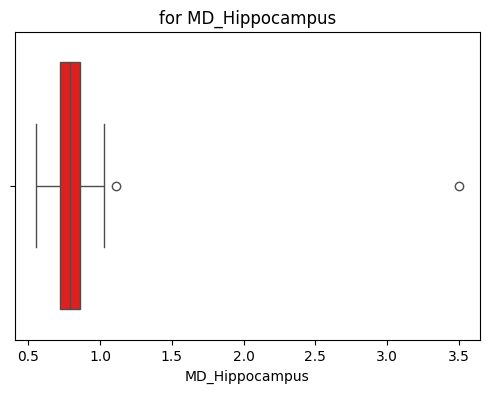

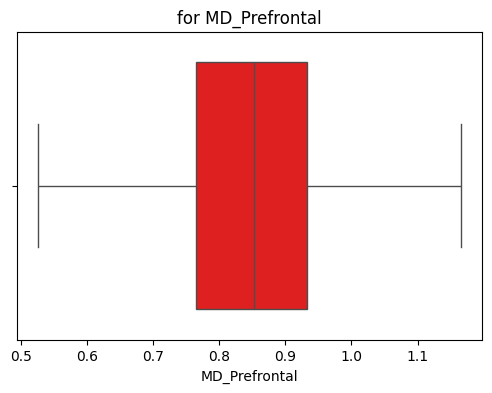

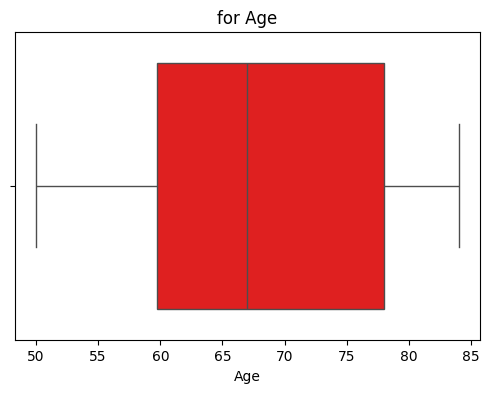

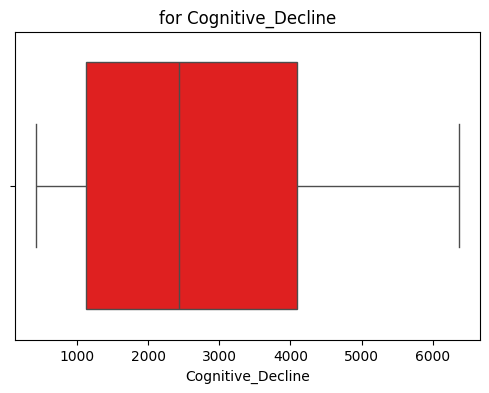

In [159]:
for featur in data.columns:
    plt.figure(figsize = (6,4))
    sns.boxplot(x=data[featur], color ='red' )
    plt.title(f'for {featur}')
    plt.xlabel(featur)
    plt.show()

In [161]:
for feature in data.columns:
    Q1= data[feature].quantile(0.25)
    Q3= data[feature].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    data[feature] = np.where(
        (data[feature] < low_bound )| (data[feature] > up_bound), 
        data[feature].median(),
        data[feature])



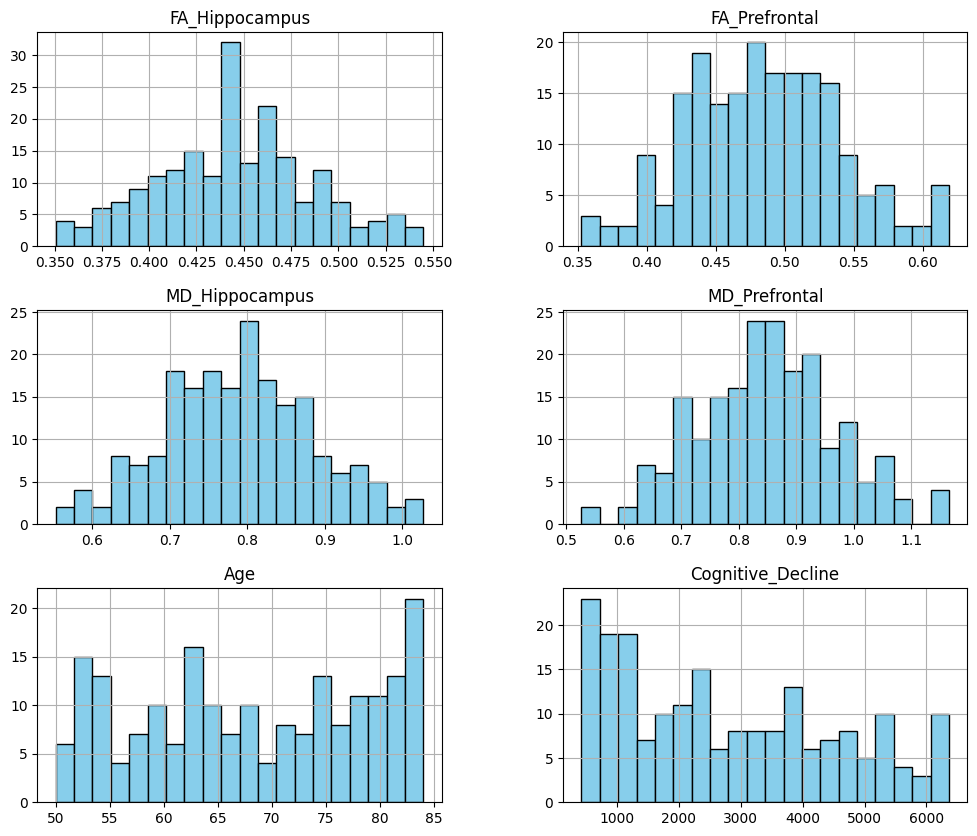

In [165]:
data.hist(bins=20, figsize=(12,10), color = 'skyblue', edgecolor = 'black')
plt.show()

In [ ]:
z = np.abs(zscore(data.iloc[: ,:-1]))
outlier_ind = np.where(z > 3)


In [173]:
stn = StandardScaler()
data.iloc[: , : -1] =  stn.fit_transform(data.iloc[: , :-1])

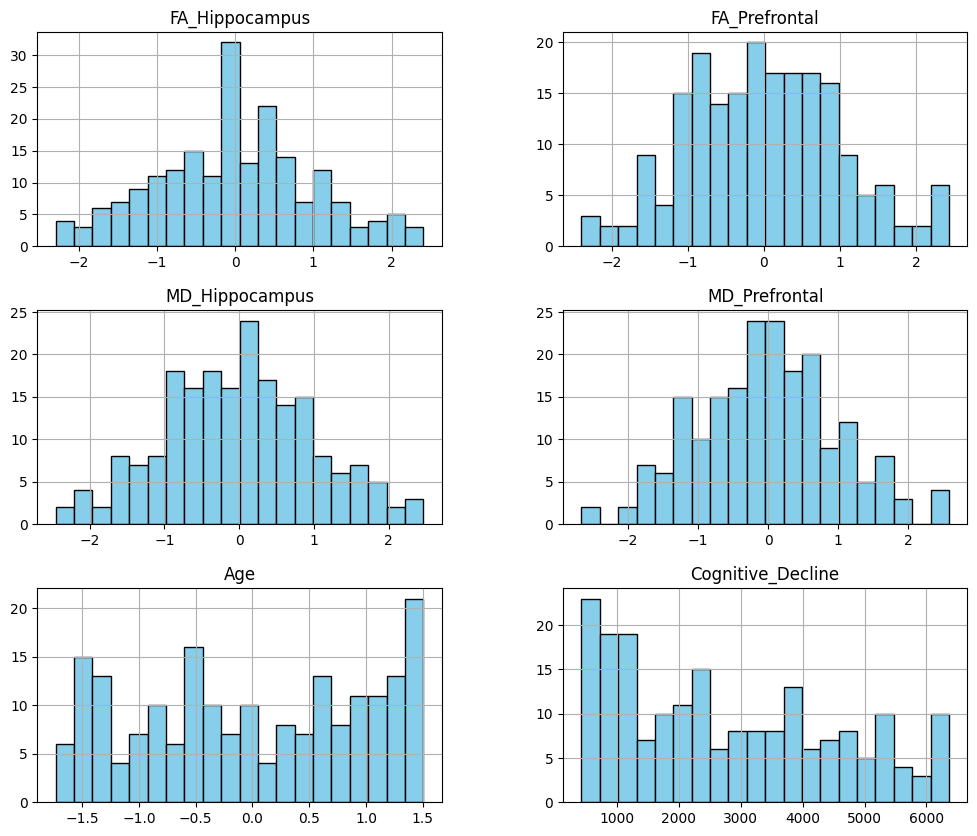

In [175]:
data.hist(bins=20, figsize=(12,10), color = 'skyblue', edgecolor = 'black')
plt.show()

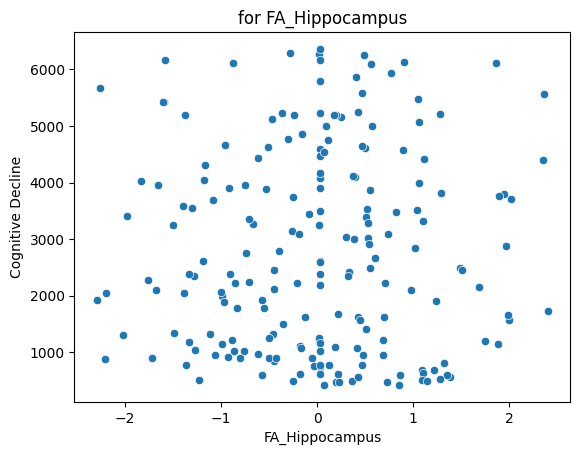

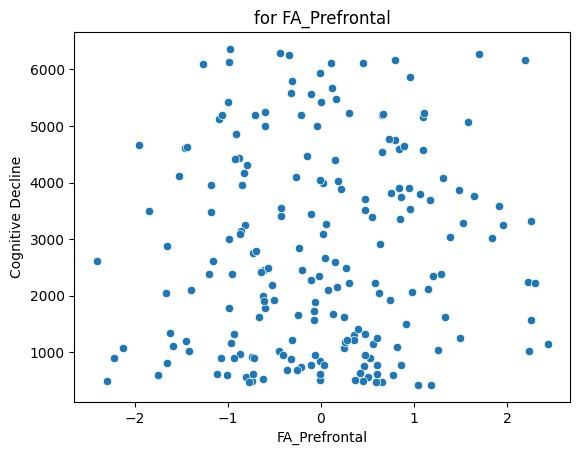

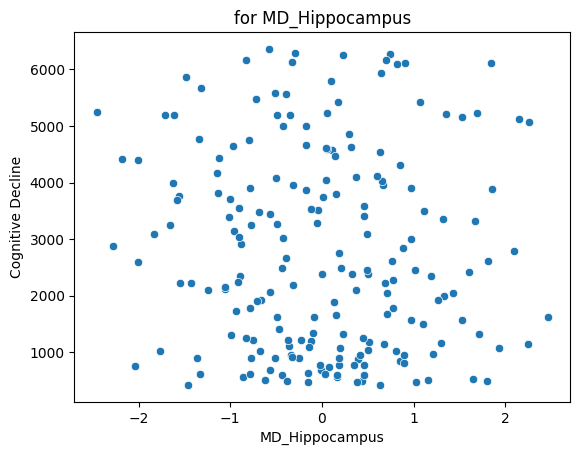

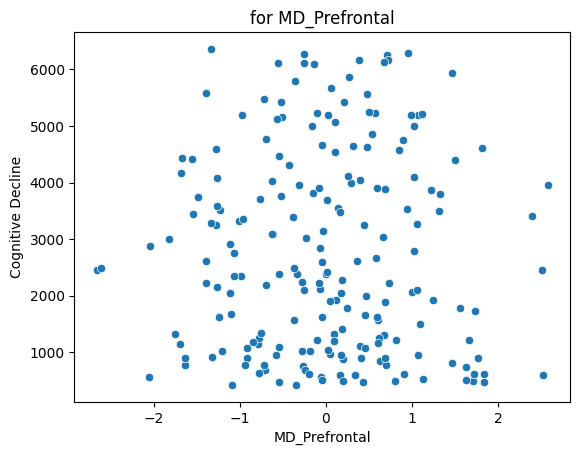

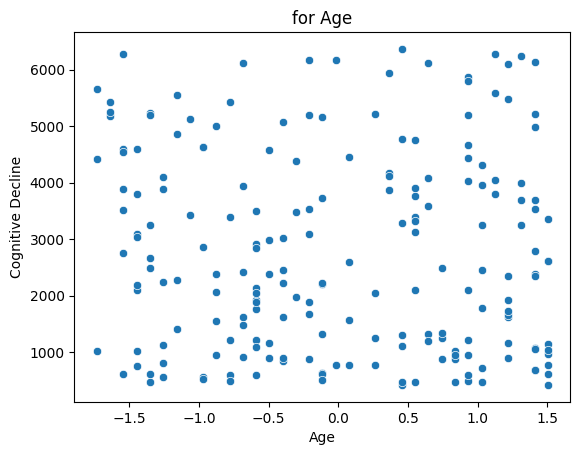

In [179]:
for feature in data.columns[: -1]:
    sns.scatterplot(x= data[feature] , y = data.iloc[: , -1])
    plt.title(f'for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cognitive Decline')
    plt.show()

In [177]:
data.iloc[: , -1]

0      2216.829743
1       889.079088
2      4581.742905
3      3797.139451
4      1105.308270
          ...     
195    4991.454566
196    4670.384190
197    3038.353509
198    5197.873133
199    1046.553078
Name: Cognitive_Decline, Length: 200, dtype: float64

In [183]:
X = data.iloc[: , :-1]
y = data.iloc[: , -1]

In [185]:
y

0      2216.829743
1       889.079088
2      4581.742905
3      3797.139451
4      1105.308270
          ...     
195    4991.454566
196    4670.384190
197    3038.353509
198    5197.873133
199    1046.553078
Name: Cognitive_Decline, Length: 200, dtype: float64

In [187]:
X

,FA_Hippocampus,FA_Prefrontal,MD_Hippocampus,MD_Prefrontal,Age
0,0.712107,0.301622,-1.544339,0.735502,-0.114244
1,-0.056171,0.522871,-0.512643,-0.915547,-0.209448
2,0.894775,1.092097,0.114241,0.846234,-0.495059
3,1.953874,1.060217,0.157515,1.324132,1.123402
4,-0.172190,-1.589877,-0.357835,0.397699,0.456977
...,...,...,...,...,...
195,0.577325,-0.599697,-0.419994,1.026709,1.409013
196,-0.958285,-1.955505,-0.171009,-0.047710,0.932995
197,0.297115,1.387268,-0.906003,0.661278,-1.447094
198,0.181547,-0.213174,-0.351850,0.019028,-0.209448


In [191]:
X_train , X_test, y_train , y_test =  train_test_split(X,y, test_size = 0.2, random_state = 6)


In [193]:
X_train

,FA_Hippocampus,FA_Prefrontal,MD_Hippocampus,MD_Prefrontal,Age
2,0.894775,1.092097,0.114241,0.846234,-0.495059
59,1.291457,0.755948,-1.133186,-0.150761,-1.447094
87,0.508883,0.552879,-1.012572,-0.377364,-0.780669
100,-1.601378,-0.991869,1.069089,-0.522791,-0.780669
16,-1.114334,-0.930649,1.717078,0.098747,-0.114244
...,...,...,...,...,...
198,0.181547,-0.213174,-0.351850,0.019028,-0.209448
79,-2.293697,-0.508294,1.269608,1.241456,1.218606
109,0.021044,-0.308708,-0.752746,1.659246,-0.590262
106,0.030376,1.304209,-0.505405,-1.267815,0.647384


In [195]:
X_test

,FA_Hippocampus,FA_Prefrontal,MD_Hippocampus,MD_Prefrontal,Age
118,1.493851,0.264978,0.211794,-0.366343,0.742588
11,-0.452381,1.149333,-1.057254,-0.063471,-1.447094
149,0.470448,-0.320975,-0.517423,-1.391934,1.123402
152,-0.711662,0.846439,1.319590,-0.968356,1.504216
145,1.057068,0.164579,-0.717437,-0.722413,1.218606
134,-1.001319,0.974461,-0.567036,1.003114,-0.875873
93,0.030376,0.837657,-0.784197,0.596810,0.552181
19,-1.597667,0.000900,0.178809,0.211320,-1.637501
4,-0.172190,-1.589877,-0.357835,0.397699,0.456977
6,2.021852,0.473008,-0.998132,-0.769655,1.409013


In [197]:
y_train

2      4581.742905
59     3806.755886
87     3385.589064
100    5430.068627
16     1328.814804
          ...     
198    5197.873133
79     1919.788977
109    1212.863791
106    4082.618474
138     502.053549
Name: Cognitive_Decline, Length: 160, dtype: float64

In [199]:
y_test

118    2489.186018
11     2110.491691
149    5586.336777
152    3351.670450
145    5482.234326
134    2072.944482
93     3911.705800
19     5423.726279
4      1105.308270
6      3700.283805
151    3292.234312
94     5221.239869
30     4435.002065
81     2921.667448
156    5556.502495
115     956.483964
88     3892.330371
108     557.957548
158    1173.240572
13     2041.561235
12     5870.157826
38     3248.888152
52     2238.539741
131    5197.883730
84     1024.577019
89      479.398412
49     1306.070997
107     619.900391
54      592.767316
181     911.162859
116    4540.321853
95     3949.521165
64      691.469661
18     1985.597199
56     2381.081830
0      2216.829743
137    6281.984932
128     476.948479
112    1099.110750
120    3988.188580
Name: Cognitive_Decline, dtype: float64

In [218]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [226]:
y_pred_train = model.predict(X_train)

In [228]:
y_pred_train

array([2982.62657097, 3155.77472656, 3013.402954  , 2697.21320855,
       2544.24787539, 2942.25893501, 2813.14748729, 3169.34379115,
       2737.67985518, 2832.57176554, 2710.02139247, 2852.36055756,
       2574.17649353, 2794.24186287, 3113.93777948, 2870.49213908,
       2123.31684126, 3059.4443711 , 2375.84557502, 2491.77242305,
       2683.58906024, 2721.94950343, 2384.18874011, 2961.87619853,
       2736.20974404, 2269.46814589, 2608.14112245, 3280.42944831,
       3234.06143207, 2338.79457931, 3088.21842346, 3138.82132107,
       2547.70843645, 2515.37387117, 2903.25804232, 2595.70179417,
       3008.00042684, 2948.03596384, 2894.75813566, 3100.40470912,
       2646.73645232, 2821.9168231 , 2811.3373298 , 3028.14586867,
       2452.17894272, 2952.47733235, 2578.09418256, 2526.88057759,
       2476.13587693, 2920.01140713, 2630.45991834, 2784.08361564,
       2538.5711013 , 2841.93331504, 2711.20142688, 2785.6447959 ,
       3082.40600083, 2371.85870533, 2666.50837563, 2895.93035

In [230]:
model.coef_

array([ -27.59020082,  141.97434864,  -72.43797264,   29.61199372,
       -179.59311685])

In [232]:
model.intercept_

2746.5714778144747

In [240]:
mse = mean_squared_error(y_train , y_pred_train)

In [242]:
mse

2964054.594462969

In [244]:
r2 = r2_score(y_train , y_pred_train)
r2

0.01917384669249378

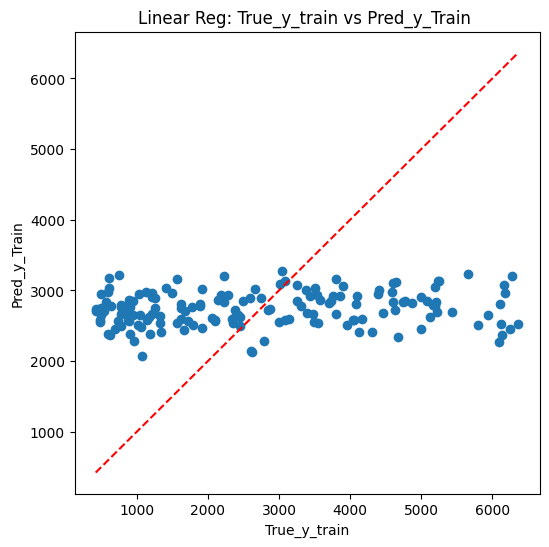

In [252]:
plt.figure(figsize = (6,6))
plt.scatter(y_train , y_pred_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--' )
plt.title('Linear Reg: True_y_train vs Pred_y_Train ')
plt.xlabel('True_y_train')
plt.ylabel('Pred_y_Train')
plt.show()

       Unnamed: 0        Age  FA_Hippocampus  MD_Prefrontal  FA_Parietal  \
count  400.000000  400.00000      400.000000     400.000000   400.000000   
mean   199.500000   69.28750        0.512744       0.786547     0.604905   
std    115.614301   11.76034        0.177109       0.155070     0.100160   
min      0.000000   50.00000        0.245560      -0.100000     0.303350   
25%     99.750000   59.00000        0.439601       0.688149     0.535928   
50%    199.500000   70.00000        0.505046       0.783551     0.603335   
75%    299.250000   79.00000        0.572362       0.887808     0.676742   
max    399.000000   89.00000        3.500000       1.250341     0.881128   

       MD_Temporal  Cognitive_Decline  
count   385.000000         400.000000  
mean      0.699756           0.583931  
std       0.116366           0.150300  
min       0.400899           0.157492  
25%       0.619749           0.466757  
50%       0.702523           0.577927  
75%       0.776362           0.6939

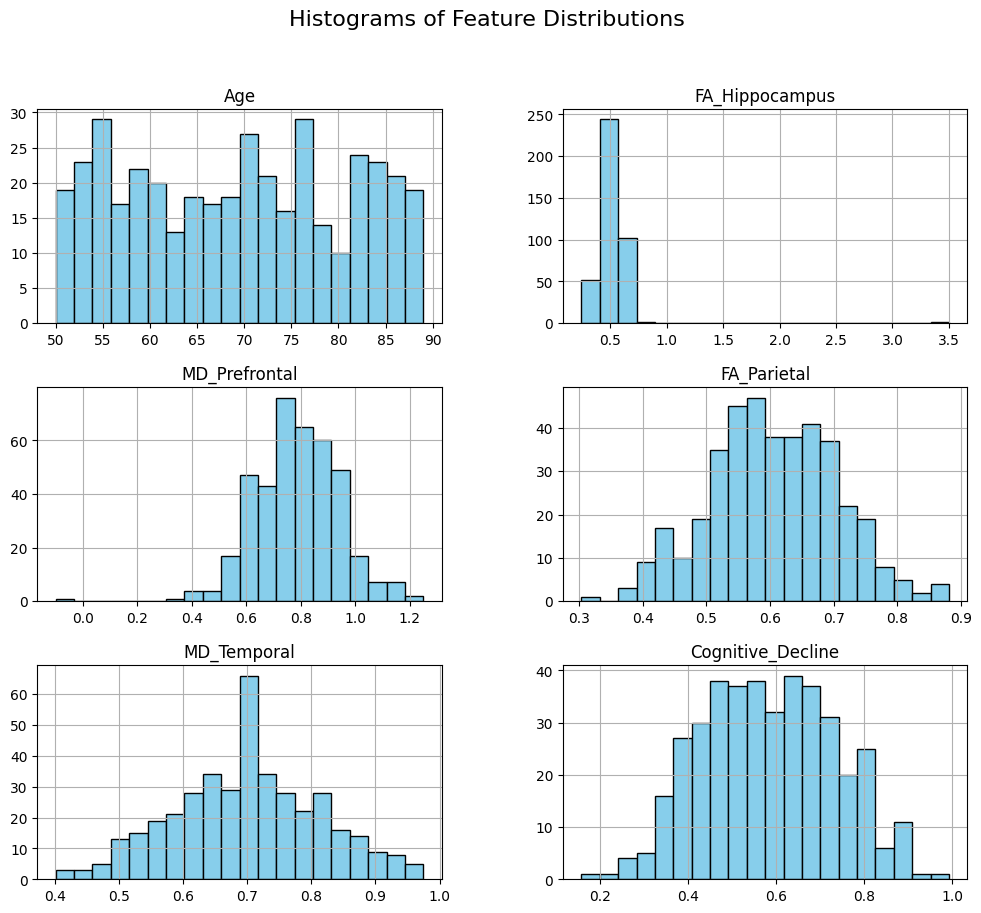

In [258]:
newdata = pd.read_csv('m.csv')
print(newdata.describe())
df = newdata.iloc[:, 1:]
df['MD_Temporal'] = df['MD_Temporal'].fillna(df['MD_Temporal'].mean())
df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Feature Distributions", fontsize=16)
plt.show()

In [260]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    df[col] = np.where(
        (df[col] < lower_bound) | (df[col] > upper_bound),
        df[col].median(),
        df[col]
    )


Age: Lower Bound = 29.0, Upper Bound = 109.0
FA_Hippocampus: Lower Bound = 0.2404595395160708, Upper Bound = 0.7715035198114742
MD_Prefrontal: Lower Bound = 0.3886606185844023, Upper Bound = 1.1872968917641697
FA_Parietal: Lower Bound = 0.32470732504692346, Upper Bound = 0.8879629369566675
MD_Temporal: Lower Bound = 0.3975086221791805, Upper Bound = 1.000193141883491
Cognitive_Decline: Lower Bound = 0.1260422262927447, Upper Bound = 1.034615057624351


In [262]:
scaler = StandardScaler()
fa_md_features = df.iloc[:, :-1]
df.iloc[:, :-1] = scaler.fit_transform(fa_md_features)

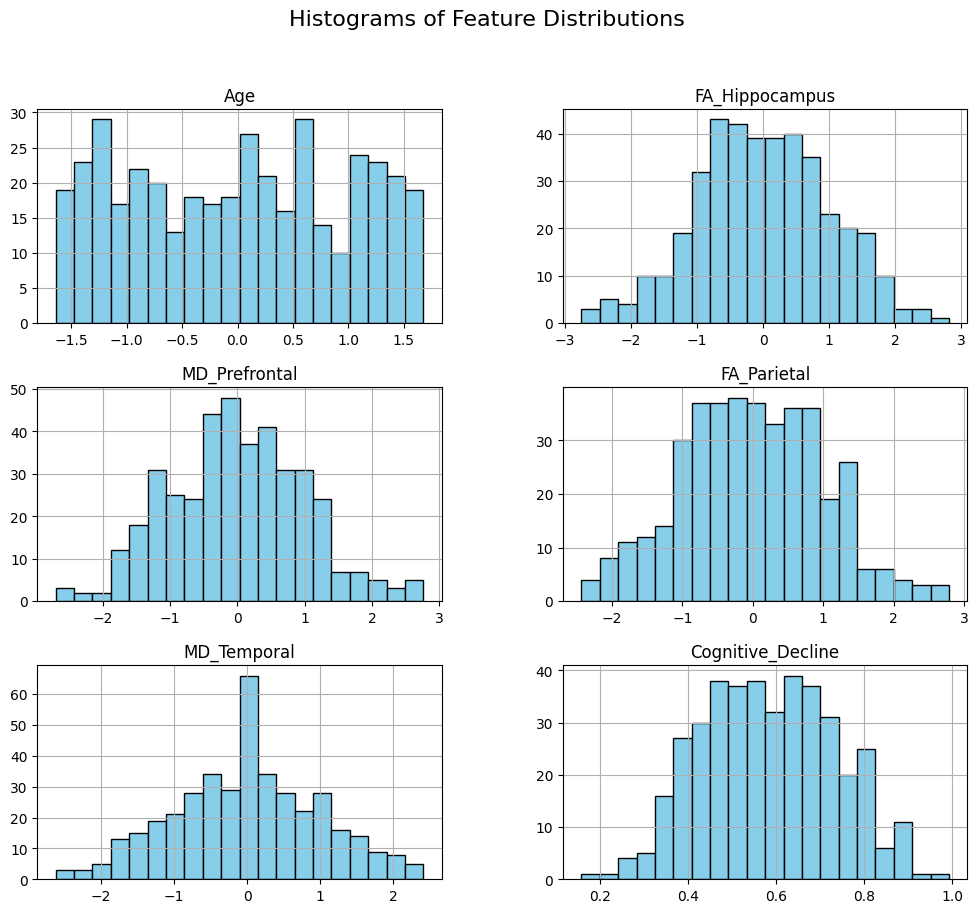

In [264]:
df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Feature Distributions", fontsize=16)
plt.show()

In [292]:
X1 = df.iloc[:, :-1]
y1 = df['Cognitive_Decline']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=6)


In [294]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)


LinearRegression()

In [296]:
y1_pred_train = model1.predict(X1_train)

In [298]:
print(f'coeff  ={model1.coef_} ')
print(f'wo  ={model1.intercept_} ')
print(f'mse  ={mean_squared_error(y1_train,y1_pred_train)} ')
print(f'r2  ={r2_score(y1_train,y1_pred_train)} ')



coeff  =[ 0.11804828  0.03063388 -0.05772292  0.02545931 -0.03186272] 
wo  =0.5835088514193278 
mse  =0.00296681006520998 
r2  =0.8682327396275121 


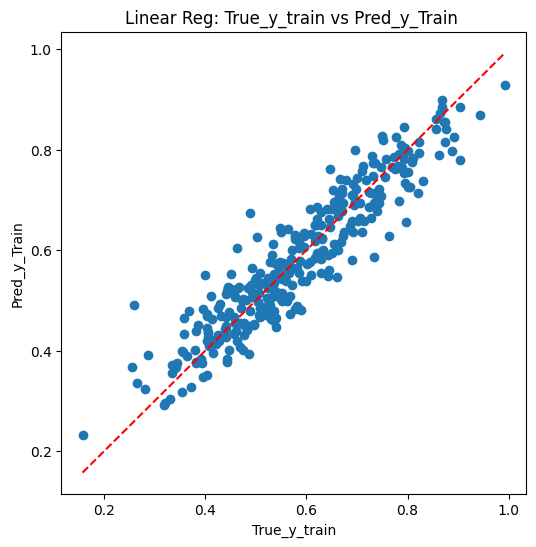

In [300]:
plt.figure(figsize = (6,6))
plt.scatter(y1_train , y1_pred_train)
plt.plot([y1_train.min(), y1_train.max()], [y1_train.min(), y1_train.max()], 'r--' )
plt.title('Linear Reg: True_y_train vs Pred_y_Train ')
plt.xlabel('True_y_train')
plt.ylabel('Pred_y_Train')
plt.show()

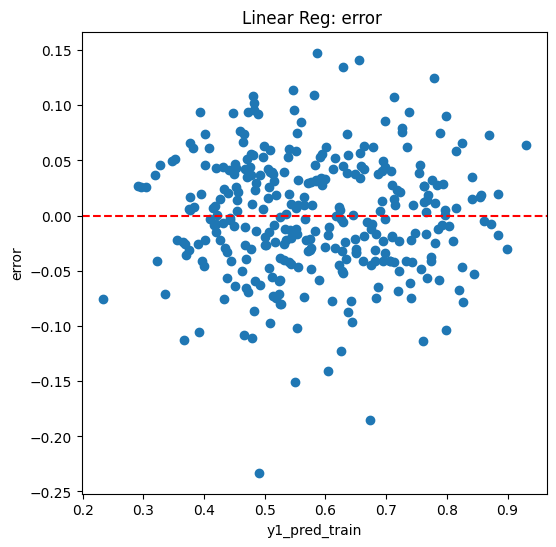

In [335]:
error = y1_train - y1_pred_train

plt.figure(figsize = (6,6))
plt.scatter(y1_pred_train , error)
plt.axhline(0,color = 'red', linestyle= '--' )
plt.title('Linear Reg: error ')
plt.xlabel('y1_pred_train')
plt.ylabel('error')
plt.show()

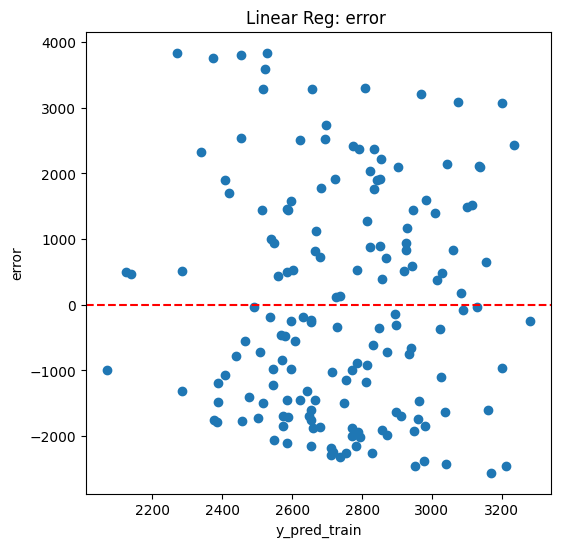

In [337]:
error = y_train - y_pred_train

plt.figure(figsize = (6,6))
plt.scatter(y_pred_train , error)
plt.axhline(0,color = 'red', linestyle= '--' )
plt.title('Linear Reg: error ')
plt.xlabel('y_pred_train')
plt.ylabel('error')
plt.show()

In [411]:
poly = PolynomialFeatures(degree = 4)
X_train_poly = poly.fit_transform(X_train)

In [413]:
X_train_poly.shape

(160, 126)

In [415]:
X_train.shape

(160, 5)

In [417]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [419]:
y_pred_train_poly =poly_model.predict(X_train_poly)

In [421]:
print(f'coeff  ={poly_model.coef_} ')
print(f'wo  ={poly_model.intercept_} ')
print(f'mse  ={mean_squared_error(y_train,y_pred_train_poly)} ')
print(f'r2  ={r2_score(y_train,y_pred_train_poly)} ')



coeff  =[-1.58671469e-09  1.24306156e+03 -9.04371904e+02  6.76309850e+01
  1.64959087e+03  5.02657995e+02 -2.89085376e+03  1.54374713e+03
  1.90505134e+03  5.61405723e+02  1.56438285e+02 -9.24462484e+02
 -3.25951278e+02  1.73509865e+03  6.20168427e+02 -1.40987522e+02
 -1.03403082e+03  1.27183118e+03  3.48251808e+02 -2.45114884e+03
  1.30591324e+03 -3.10431923e+02  3.74928836e+02  2.81355587e+02
  5.80803211e+01  2.91302775e+01  8.83302236e+02 -4.86067958e+02
 -1.63072724e+03 -2.13081585e+02 -1.13151560e+03  1.46704655e+03
  6.21040959e+02 -5.55944566e+02  7.47745124e+02 -3.87866489e+02
 -2.57516026e+02  1.64165874e+02  5.65653056e+01  1.97343278e+02
  7.98905242e+02  1.55473102e+03  1.07721472e+03 -1.93102581e+02
  7.91559653e+02  7.00274458e+02  5.02218002e+02 -9.06560714e+02
  1.39046414e+03 -1.20985338e+03 -1.24054516e+03  1.53991676e+02
 -5.57785732e+02 -5.24932144e+01 -1.74218877e+02 -4.57086007e+02
  3.24267051e+02  3.37131315e+02 -1.61662351e+02 -6.75888380e+02
  1.35531988e+02 

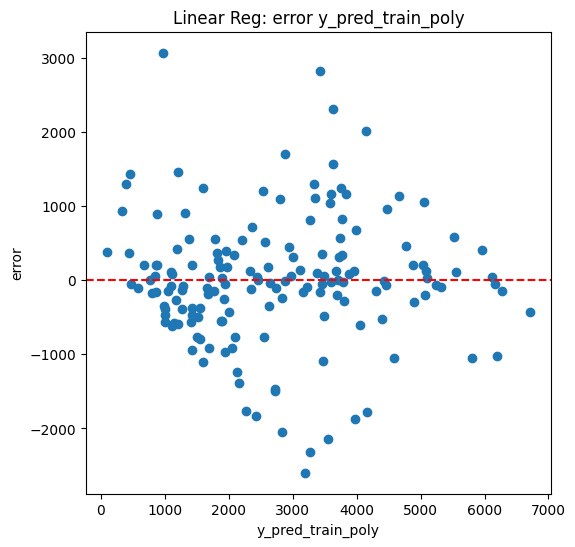

In [423]:
error = y_train - y_pred_train_poly

plt.figure(figsize = (6,6))
plt.scatter(y_pred_train_poly , error)
plt.axhline(0,color = 'red', linestyle= '--' )
plt.title('Linear Reg: error y_pred_train_poly')
plt.xlabel('y_pred_train_poly')
plt.ylabel('error')
plt.show()

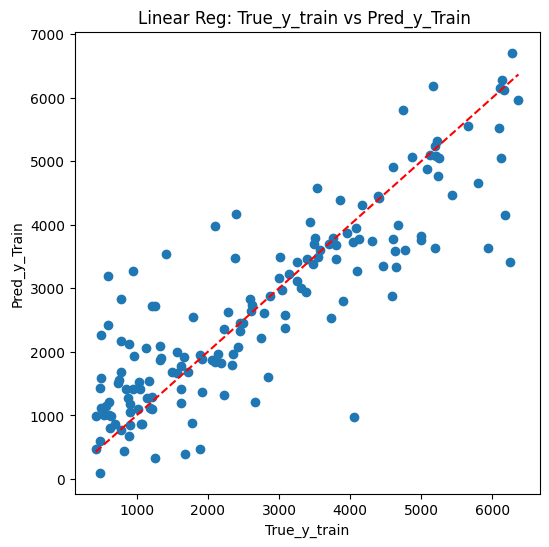

In [425]:
plt.figure(figsize = (6,6))
plt.scatter(y_train , y_pred_train_poly)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--' )
plt.title('Linear Reg: True_y_train vs Pred_y_Train ')
plt.xlabel('True_y_train')
plt.ylabel('Pred_y_Train')
plt.show()

mse-test =3337920.13988577 
r2-test  =-0.03735395940671715 


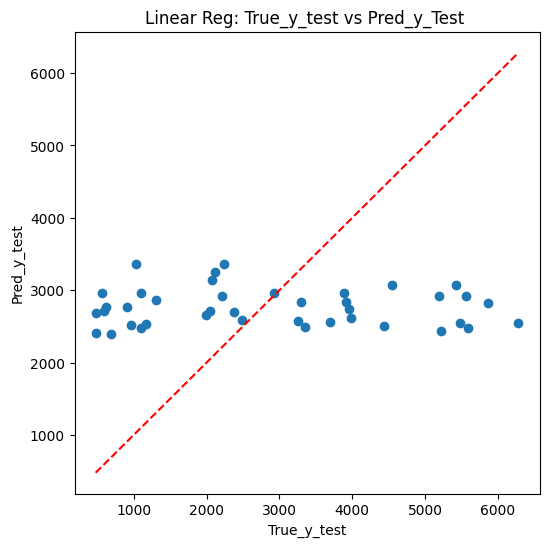

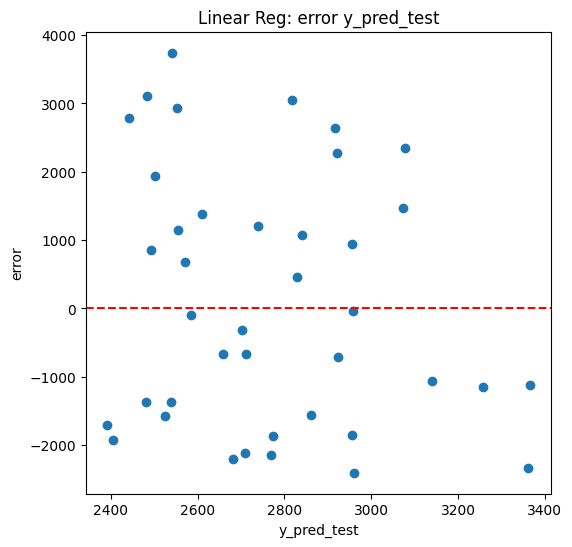

In [429]:
#test
y_pred_test = model.predict(X_test)
print(f'mse-test ={mean_squared_error(y_test,y_pred_test)} ')
print(f'r2-test  ={r2_score(y_test,y_pred_test)} ')
#real vs pred test
plt.figure(figsize = (6,6))
plt.scatter(y_test , y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--' )
plt.title('Linear Reg: True_y_test vs Pred_y_Test ')
plt.xlabel('True_y_test')
plt.ylabel('Pred_y_test')
plt.show()
#error
error = y_test - y_pred_test

plt.figure(figsize = (6,6))
plt.scatter(y_pred_test , error)
plt.axhline(0,color = 'red', linestyle= '--' )
plt.title('Linear Reg: error y_pred_test')
plt.xlabel('y_pred_test')
plt.ylabel('error')
plt.show()

mse-test =167271614.63691735 
r2-test  =-50.984428766441056 


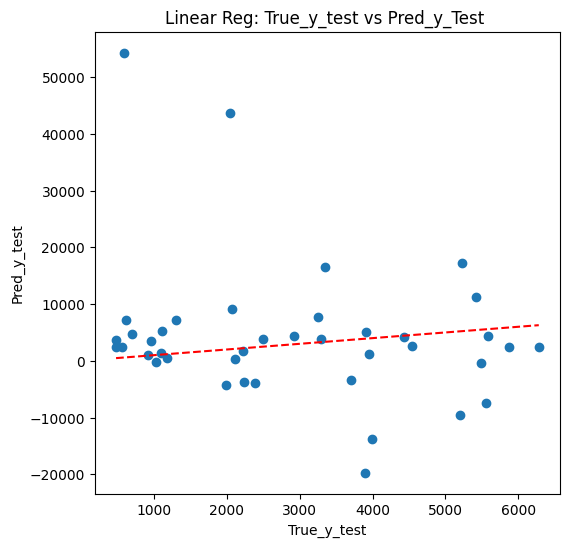

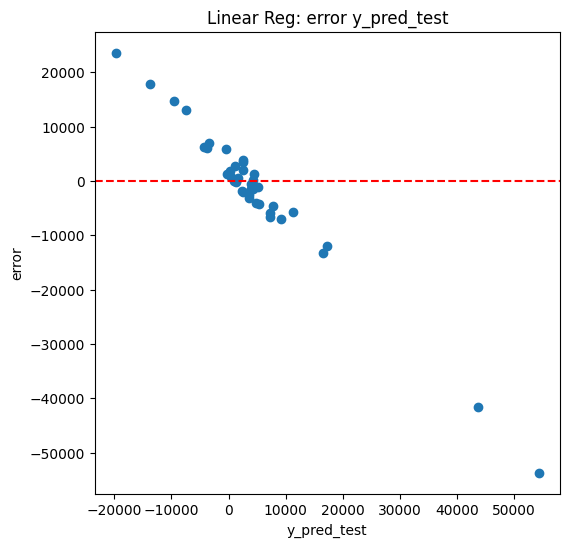

In [433]:
X_test_poly = poly.fit_transform(X_test)

#test
y_pred_test = poly_model.predict(X_test_poly)
print(f'mse-test ={mean_squared_error(y_test,y_pred_test)} ')
print(f'r2-test  ={r2_score(y_test,y_pred_test)} ')
#real vs pred test
plt.figure(figsize = (6,6))
plt.scatter(y_test , y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--' )
plt.title('Linear Reg: True_y_test vs Pred_y_Test ')
plt.xlabel('True_y_test')
plt.ylabel('Pred_y_test')
plt.show()
#error
error = y_test - y_pred_test

plt.figure(figsize = (6,6))
plt.scatter(y_pred_test , error)
plt.axhline(0,color = 'red', linestyle= '--' )
plt.title('Linear Reg: error y_pred_test')
plt.xlabel('y_pred_test')
plt.ylabel('error')
plt.show()

mse-test =0.003335540479172865 
r2-test  =0.8524480701622852 


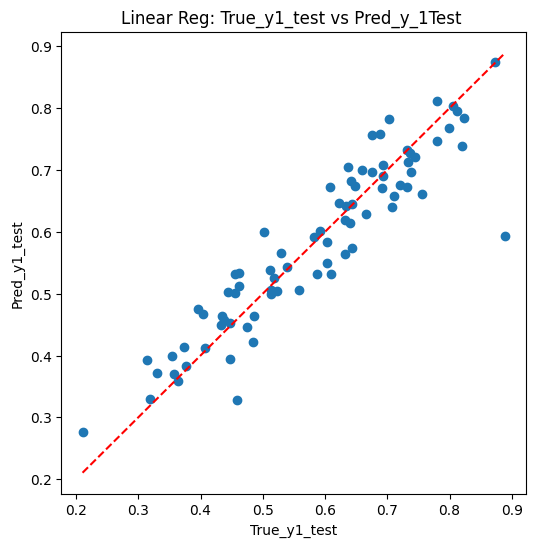

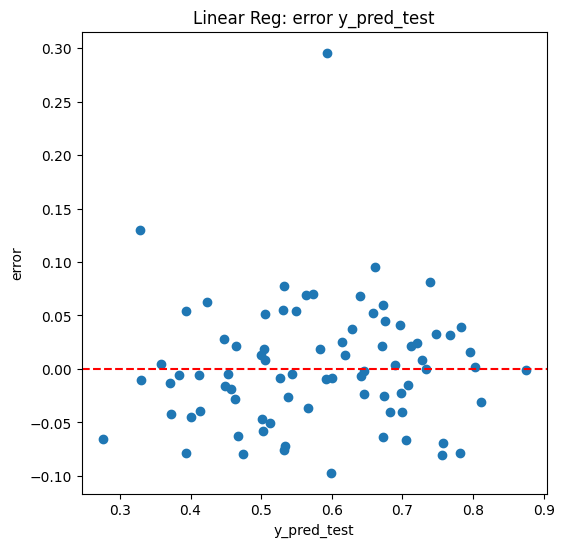

In [437]:
#test
y1_pred_test = model1.predict(X1_test)
print(f'mse-test ={mean_squared_error(y1_test,y1_pred_test)} ')
print(f'r2-test  ={r2_score(y1_test,y1_pred_test)} ')
#real vs pred test
plt.figure(figsize = (6,6))
plt.scatter(y1_test , y1_pred_test)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'r--' )
plt.title('Linear Reg: True_y1_test vs Pred_y_1Test ')
plt.xlabel('True_y1_test')
plt.ylabel('Pred_y1_test')
plt.show()
#error
error = y1_test - y1_pred_test

plt.figure(figsize = (6,6))
plt.scatter(y1_pred_test , error)
plt.axhline(0,color = 'red', linestyle= '--' )
plt.title('Linear Reg: error y_pred_test')
plt.xlabel('y_pred_test')
plt.ylabel('error')
plt.show()

In [443]:
r2_test = model1.score(X1_test, y1_test)

In [445]:
r2_test

0.8524480701622852